# Import Libraries

In [1]:
# For Data Cleaning
import pandas as pd
import numpy as np
# For Data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# For visualizing the missing values in the data

# Import Data

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\AI ML\sentiment analysis\British_Airway_Review.csv")

In [3]:
df.head(2)

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure


In [4]:
df.shape

(2500, 8)

# Data Preprocessing

In [5]:
df.dtypes

reviews              object
date                 object
country              object
seat_type            object
recommended          object
stars                 int64
route                object
type_of_traveller    object
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].dt.year

In [8]:
df['reviews'].str.startswith('✅ Trip Verified ').count()

2500

In [9]:
df.drop(columns='date',
       inplace = True)

In [10]:
df.head()

,reviews,country,seat_type,recommended,stars,route,type_of_traveller,year
0,✅ Trip Verified | I had the most fantastic BA...,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure,2023
1,✅ Trip Verified | Couldn’t book in online. Ar...,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure,2023
2,✅ Trip Verified | London Heathrow to Mumbai in...,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure,2023
3,"✅ Trip Verified | Keflavík, Iceland to London ...",Iceland,Business Class,yes,5,London to Luanda,Couple Leisure,2023
4,✅ Trip Verified | Terrible Experience with Bri...,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure,2023


In [11]:
# Creating an id column for easier analysis
df['id'] = [i for i in range(len(df))]

In [12]:
df = df[['id','reviews','year','country','seat_type','recommended','stars','route','type_of_traveller']].copy()

In [13]:
df.duplicated().any()

False

In [14]:
df.sample()

,id,reviews,year,country,seat_type,recommended,stars,route,type_of_traveller
484,484,✅ Trip Verified | Due to the coronavirus situ...,2020,United Kingdom,Premium Economy,no,5,Denver to Heathrow,Family Leisure


In [15]:
df.year.unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015], dtype=int64)

In [16]:
df.stars.unique()

array([5, 3, 1, 9, 7], dtype=int64)

In [17]:
df.country.unique()

array(['Hong Kong', 'United Kingdom', 'Iceland', 'Canada', 'Qatar',
       'Spain', 'Germany', 'United States', 'South Africa', 'Greece',
       'Italy', 'Senegal', 'United Arab Emirates', 'Romania', 'Australia',
       'Cyprus', 'Chile', 'Sweden', 'Ireland', 'Netherlands', 'Austria',
       'France', 'India', 'Belgium', 'New Zealand', 'Czech Republic',
       'Malaysia', 'Singapore', 'Ghana', 'Switzerland', 'Bermuda',
       'Botswana', 'Brazil', 'Panama', 'Nigeria', 'Russian Federation',
       'Philippines', 'Bulgaria', 'Poland', 'Thailand', 'Argentina',
       'Mexico', 'Denmark', 'Saint Kitts and Nevis', 'Vietnam', 'Norway',
       'Jordan', 'Japan', 'Taiwan', 'China', 'Slovakia', 'Kuwait',
       'Israel', 'South Korea', 'Saudi Arabia', 'Hungary', 'Portugal',
       'Cayman Islands', 'Costa Rica', 'Egypt', 'Laos', 'Turkey',
       'Indonesia', 'Bahrain', 'Dominican Republic', 'Luxembourg',
       'Finland'], dtype=object)

In [18]:
df.seat_type.unique()

array(['Business Class', 'Economy Class', 'Premium Economy',
       'First Class'], dtype=object)

In [19]:
df.recommended.unique()

array(['yes', 'no'], dtype=object)

In [20]:
df.route.unique()

array(['Heathrow to Las Vegas', 'Rome to Heathrow', 'Gatwick to Venice',
       'London to Luanda', 'Denver to Heathrow', 'BKK to LHR',
       'London to Tampa', 'London to Sydney', 'LHR to CPT', 'BLR to LHR'],
      dtype=object)

In [21]:
df.type_of_traveller.unique()

array(['Family Leisure', 'Solo Leisure', 'Couple Leisure', 'Business'],
      dtype=object)

In [22]:
df.head()

,id,reviews,year,country,seat_type,recommended,stars,route,type_of_traveller
0,0,✅ Trip Verified | I had the most fantastic BA...,2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,1,✅ Trip Verified | Couldn’t book in online. Ar...,2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,2,✅ Trip Verified | London Heathrow to Mumbai in...,2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,3,"✅ Trip Verified | Keflavík, Iceland to London ...",2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,4,✅ Trip Verified | Terrible Experience with Bri...,2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


In [23]:
example = df['reviews'].iloc[1]
example

'✅ Trip Verified |  Couldn’t book in online. Arrived at check in to find we had been bumped off due to overselling. No BA staff available. Very helpful Gatwick staff got us a bus to LHR and a flight to Toulouse. Had knock in effect on our car booking and sharing as the rest of family had been able yo board original flight. Airlines should be legally stopped from selling seats twice.'

# TextBlob

By providing an input sentence, the TextBlob’s sentiment property returns a named tuple with polarity and subjectivity scores. The polarity score ranges from -1.0 to 1.0, where -1.0 indicates a negative sentiment and +1.0 a positive sentiment. 
The subjectivity ranges from 0.0 to 1.0 where 0.0 is an objective statement and 1 is a subjective statement.
Subjective sentences refers to personal opinion, judgement or emotion, whereas objective sentences refers to factual information.

In [24]:
from textblob import Word, TextBlob

In [25]:
TextBlob(example).sentiment

Sentiment(polarity=0.25833333333333336, subjectivity=0.4416666666666667)

In [26]:
df.reviews.astype(str)

0       ✅ Trip Verified |  I had the most fantastic BA...
1       ✅ Trip Verified |  Couldn’t book in online. Ar...
2       ✅ Trip Verified | London Heathrow to Mumbai in...
3       ✅ Trip Verified | Keflavík, Iceland to London ...
4       ✅ Trip Verified | Terrible Experience with Bri...
                              ...                        
2495    Roundtrip with British Airways from Bangkok to...
2496    Awful customer service. My wife and I have flo...
2497    I travelled from London to Sydney via Singapor...
2498    British Airways have just moved Cape Town flig...
2499    Bengaluru to Heathrow. My first long haul flig...
Name: reviews, Length: 2500, dtype: object

In [27]:
df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment[1])

Next step is to analyze if the review is Positive, Negative or Neutral. This would be done using the [Polarity] column.

- Negative = [Polarity] < 0
- Neutral = [Polarity] = 0
- Positive = [Polarity] > 0

In [28]:
def sent_scored(r):
    if r < 0:
        return 'Negative'
    if r == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['scored'] = df['polarity'].apply(sent_scored)

In [29]:
df.head(3)

,id,reviews,year,country,seat_type,recommended,stars,route,type_of_traveller,polarity,subjectivity,scored
0,0,✅ Trip Verified | I had the most fantastic BA...,2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure,0.383610,0.562995,Positive
1,1,✅ Trip Verified | Couldn’t book in online. Ar...,2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure,0.258333,0.441667,Positive
2,2,✅ Trip Verified | London Heathrow to Mumbai in...,2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure,0.317250,0.604906,Positive


# Data Visualization

## 1. Top 10 countries having most reviews

In [30]:
country_count = df.groupby('country')['id'].sum().reset_index().sort_values('id', ascending = False)[:10]
country_count

,country,id
64,United Kingdom,2022202
65,United States,307688
9,Canada,98805
1,Australia,90544
21,Germany,72540
59,Switzerland,39081
55,South Africa,28352
12,China,28310
39,Netherlands,28117
20,France,27969


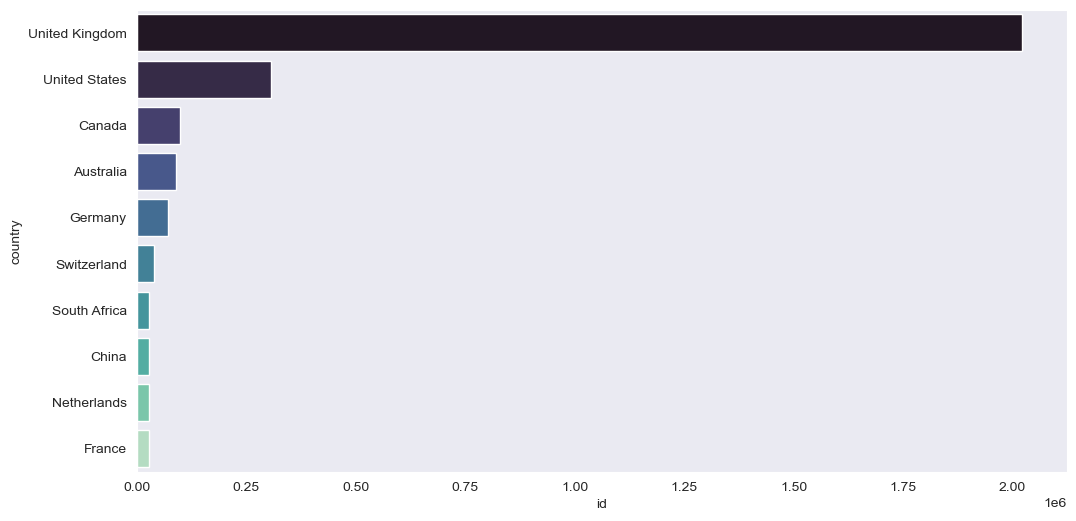

In [77]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
country_bar = sns.barplot(data = country_count, x = 'id', y = 'country', orient = 'h', palette = "mako")

## 2. Number of reviews per year

In [32]:
year_id = df.groupby('year')['id'].sum().reset_index()
year_id

,year,id
0,2015,256935
1,2016,1202415
2,2017,880022
3,2018,353322
4,2019,267178
5,2020,54132
6,2021,36975
7,2022,58575
8,2023,14196


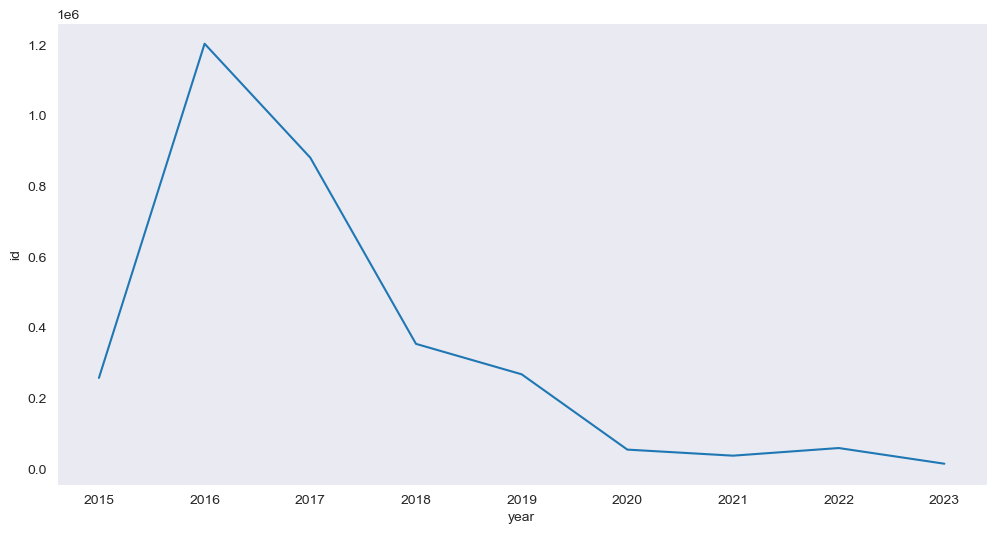

In [75]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
year_line = sns.lineplot(data = year_id, x = 'year', y = 'id')

## 3. Types of travellers and Seats distribution

In [34]:
traveller = df.groupby('type_of_traveller')['id'].sum().reset_index()
traveller

,type_of_traveller,id
0,Business,626000
1,Couple Leisure,1251000
2,Family Leisure,623500
3,Solo Leisure,623250


In [35]:
seat = df.groupby('seat_type')['id'].sum().reset_index()
seat

,seat_type,id
0,Business Class,904224
1,Economy Class,1671650
2,First Class,214938
3,Premium Economy,332938


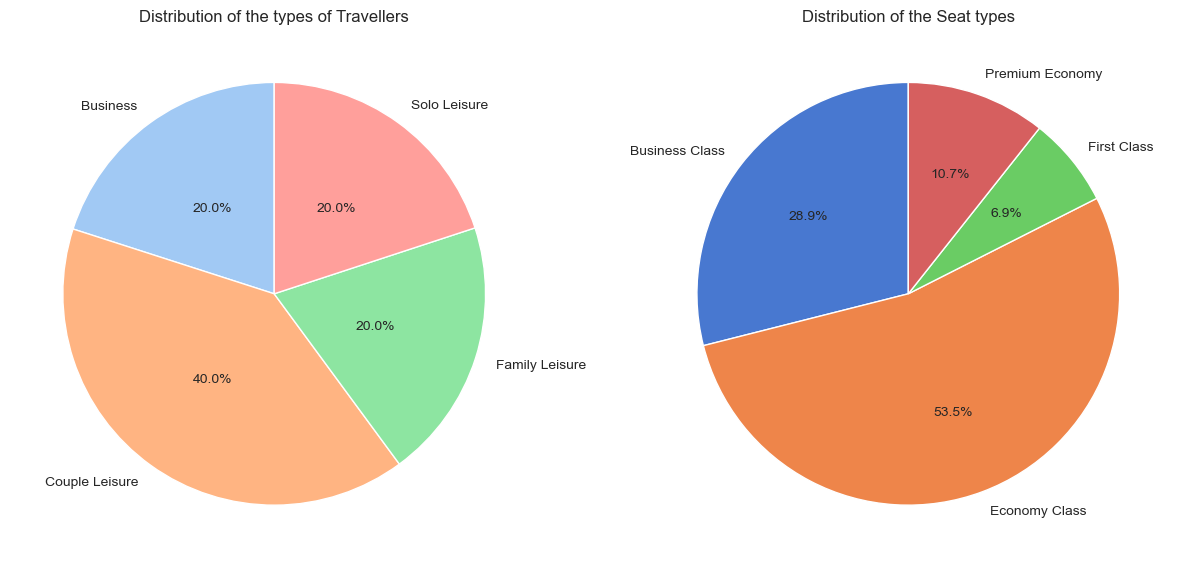

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,10))
color2 = sns.color_palette('pastel')
ax1.pie(data = traveller, x = 'id', labels = 'type_of_traveller', startangle=90, colors = color2, 
        autopct = "%1.1f%%", pctdistance = 0.5,labeldistance = 1.1)
ax1.set_title("Distribution of the types of Travellers")

color3 = sns.color_palette("muted")
ax2.pie(data = seat, x = 'id', labels = 'seat_type', startangle=90,
        colors = color3, autopct = "%1.1f%%")
ax2.set_title("Distribution of the Seat types")

plt.show()

## 4. Distribution of the Recommendation of the British Airways

In [37]:
recom = df.groupby('recommended')['id'].sum().reset_index()
recom

,recommended,id
0,no,1949197
1,yes,1174553


Text(0.5, 1.0, 'Distribution of the Recommendation of the British Airways')

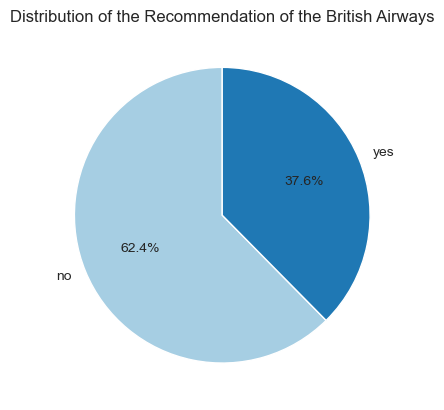

In [73]:
color4 = sns.color_palette("Paired")
plt.pie(data = recom, x = 'id', labels = 'recommended', startangle=90, autopct = "%1.1f%%", colors = color4)
plt.title("Distribution of the Recommendation of the British Airways") 

## 5. Route Count distribution

In [78]:
route_count = df.groupby('route')['id'].sum().reset_index()
route_count.style.background_gradient(cmap='Blues')

,route,id
0,BKK to LHR,312500
1,BLR to LHR,313500
2,Denver to Heathrow,312250
3,Gatwick to Venice,311750
4,Heathrow to Las Vegas,311250
5,LHR to CPT,313250
6,London to Luanda,312000
7,London to Sydney,313000
8,London to Tampa,312750
9,Rome to Heathrow,311500


## 6. Rating distribution

In [79]:
star_count = df.groupby('stars')['id'].sum().reset_index()
star_count

,stars,id
0,1,283750
1,3,1421250
2,5,850569
3,7,284204
4,9,283977


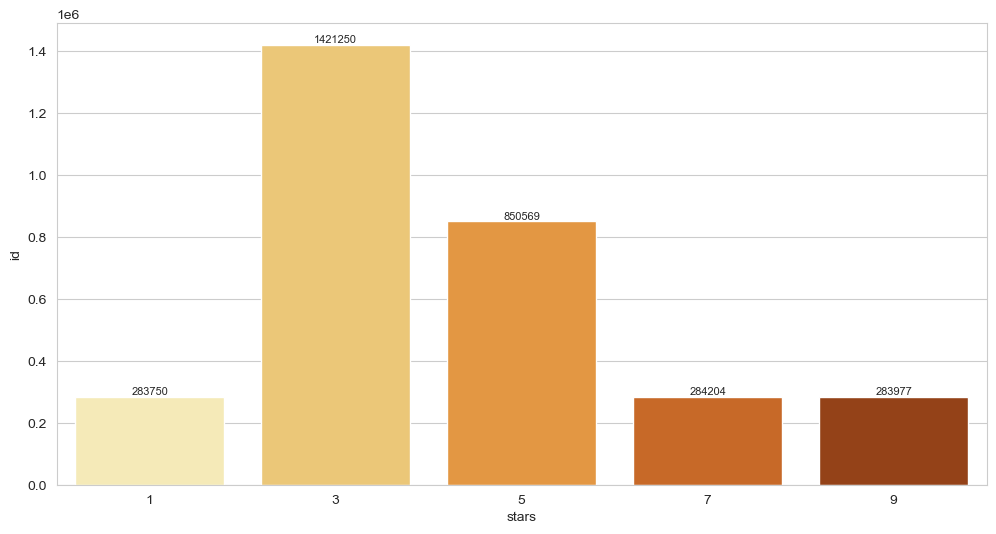

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(data = star_count, x = 'stars', y = 'id', palette = "YlOrBr")
for i, count in enumerate(star_count['id']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)

## 7. Recommendation of the airlines distribution by type of travellers and seat types 

Text(0.5, 1.0, 'Distribution of recommendations by seat type')

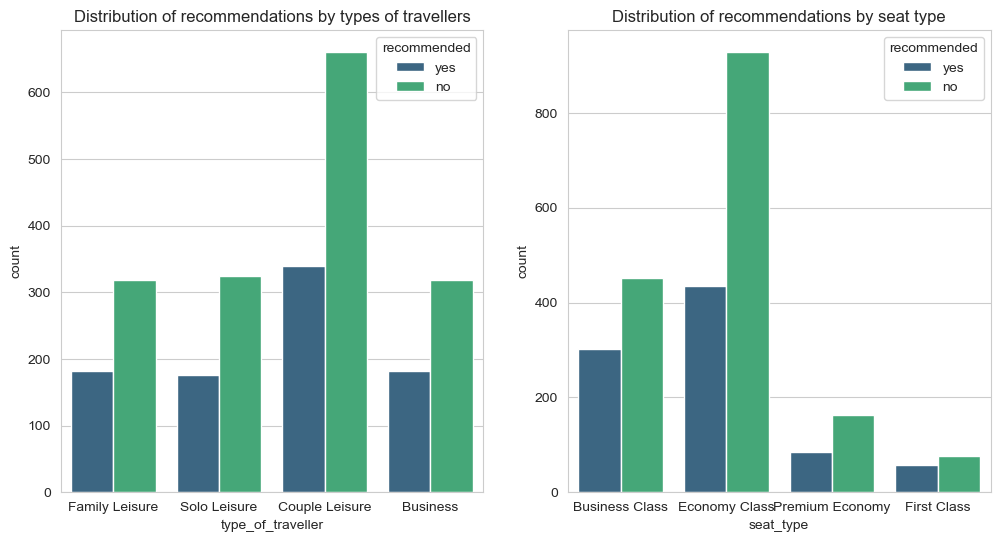

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(x = df['type_of_traveller'] , hue = df['recommended'], ax = ax1, palette = 'viridis')
ax1.set_title("Distribution of recommendations by types of travellers")
sns.countplot(x = df['seat_type'] , hue = df['recommended'], ax = ax2, palette = 'viridis')
ax2.set_title("Distribution of recommendations by seat type")

## 8. Sentiment Analysis

In [54]:
sent_count = df.groupby('scored')['id'].count().reset_index()
sent_count

,scored,id
0,Negative,793.0
1,Neutral,13.0
2,Positive,1694.0


Text(0.5, 1.0, 'Sentiment Analysis ')

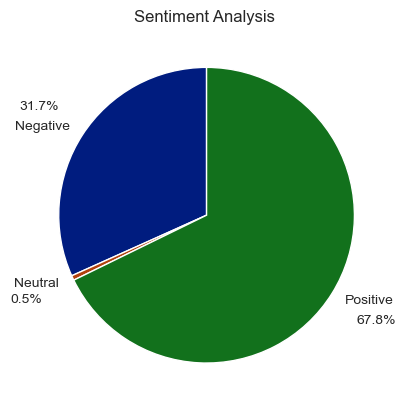

In [55]:
color4 = sns.color_palette('dark')
plt.pie(data = sent_count, x = 'id', labels = 'scored', startangle=90, autopct = "%1.1f%%", 
        pctdistance=1.35, colors = color4)
plt.title("Sentiment Analysis ") 

## 9. Seat type Sentiment analysis

<Axes: xlabel='seat_type', ylabel='count'>

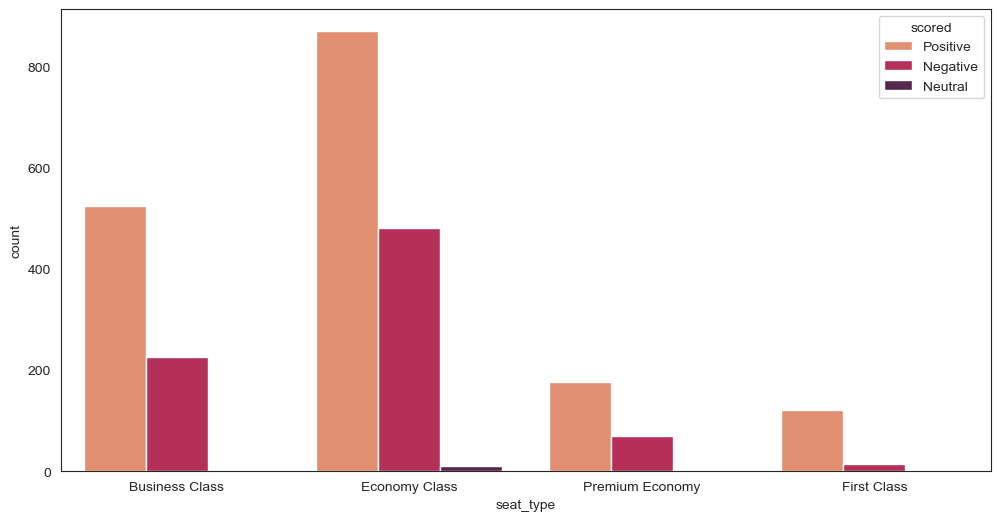

In [104]:
sns.set_style("white")
plt.figure(figsize=(12,6))
sns.countplot(x = df['seat_type'], hue = df['scored'], palette = 'rocket_r')

## 10. Traveller type Sentiment analysis

<Axes: xlabel='type_of_traveller', ylabel='count'>

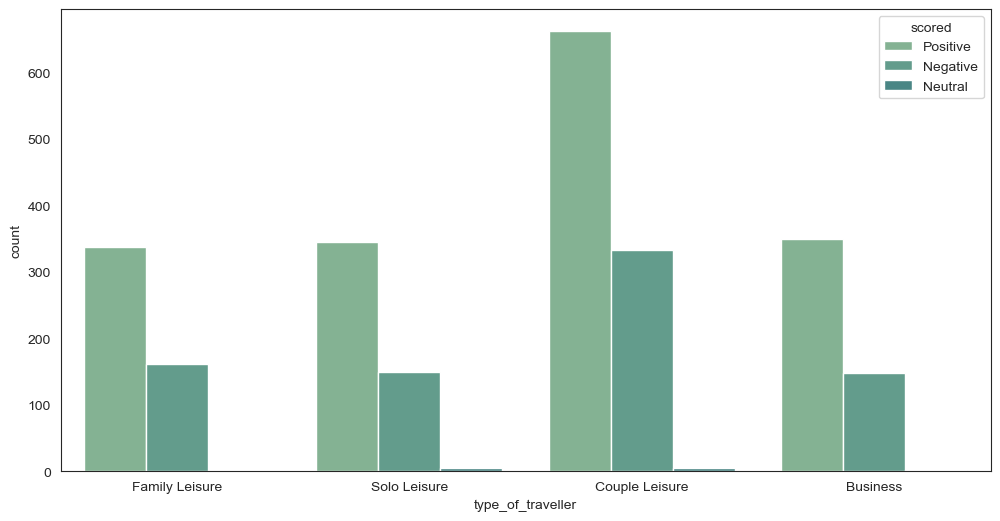

In [113]:
color5 = sns.color_palette("crest")
plt.figure(figsize=(12,6))
sns.countplot(x = df['type_of_traveller'], hue = df['scored'], palette = color5)